In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Data Understanding

In [5]:
data= pd.read_csv("Online Sales Data.csv")
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [6]:
data.shape

(240, 9)

In [7]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


Data Cleaning

In [9]:
data.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,240.0,10120.500000,69.426220,10001.0,10060.750,10120.50,10180.250,10240.00
Units Sold,240.0,2.158333,1.322454,1.0,1.000,2.00,3.000,10.00
Unit Price,240.0,236.395583,429.446695,6.5,29.500,89.99,249.990,3899.99
Total Revenue,240.0,335.699375,485.804469,6.5,62.965,179.97,399.225,3899.99


In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data["day"] = data.Date.dt.day
data["month"] = data.Date.dt.month 

In [13]:
data

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,day,month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,3,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,4,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,5,1
...,...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal,23,8
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card,24,8
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card,25,8
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal,26,8


Exploratory Data Analysis (EDA)

In [14]:
data['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [31]:
data['Product Name'].nunique()

232

In [16]:
data['Units Sold'].unique()

array([ 2,  1,  3,  4,  5,  6, 10], dtype=int64)

In [17]:
data['Unit Price'].describe()

count     240.000000
mean      236.395583
std       429.446695
min         6.500000
25%        29.500000
50%        89.990000
75%       249.990000
max      3899.990000
Name: Unit Price, dtype: float64

In [18]:
maxprice=data['Unit Price'].mean() + data['Unit Price'].std() * 3 
maxprice

1524.735668064766

In [19]:
data[ data['Unit Price']> maxprice]

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,day,month
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card,7,1
35,10036,2024-02-05,Sports,Peloton Bike,1,1895.00,1895.00,Asia,Credit Card,5,2
72,10073,2024-03-13,Electronics,HP Spectre x360 Laptop,1,1599.99,1599.99,North America,Credit Card,13,3
102,10103,2024-04-12,Electronics,Canon EOS R5 Camera,1,3899.99,3899.99,North America,Credit Card,12,4
216,10217,2024-08-04,Electronics,Apple MacBook Pro 16-inch,1,2399.00,2399.00,North America,Credit Card,4,8


In [20]:
data['Total Revenue'].describe()

count     240.000000
mean      335.699375
std       485.804469
min         6.500000
25%        62.965000
50%       179.970000
75%       399.225000
max      3899.990000
Name: Total Revenue, dtype: float64

In [21]:
data['Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [22]:
data['Payment Method'].value_counts()

Payment Method
Credit Card    120
PayPal          80
Debit Card      40
Name: count, dtype: int64

In [23]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,day,month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,3,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,4,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,5,1


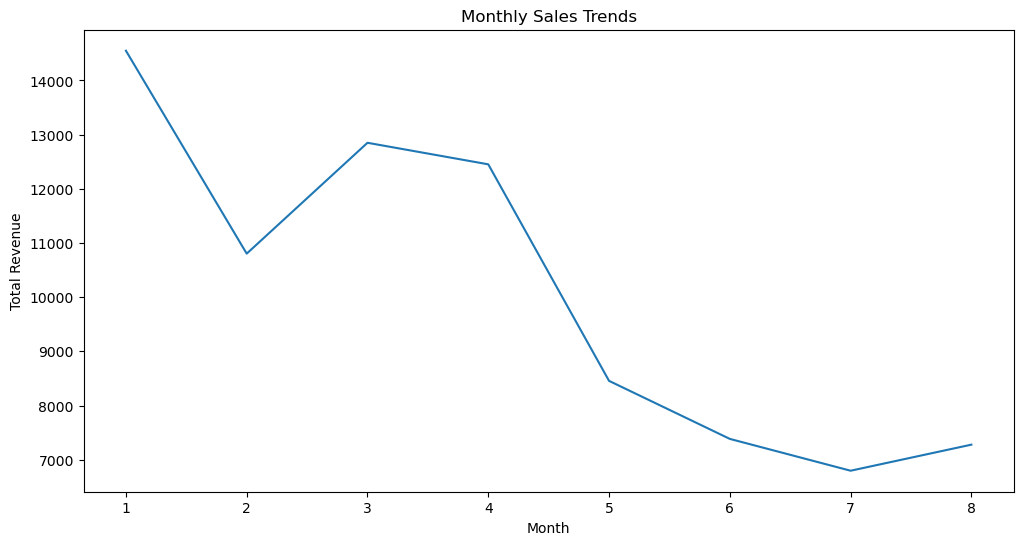

In [24]:
monthly_sales = data.groupby('month')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['Total Revenue'])
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

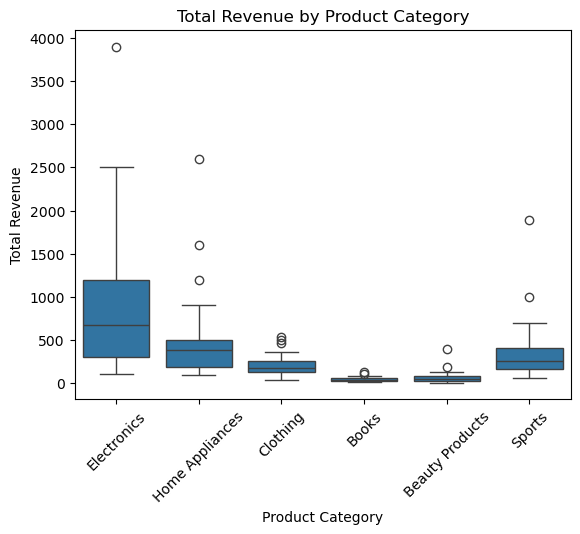

In [25]:
sns.boxplot(x='Product Category', y='Total Revenue', data=data)
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.show()

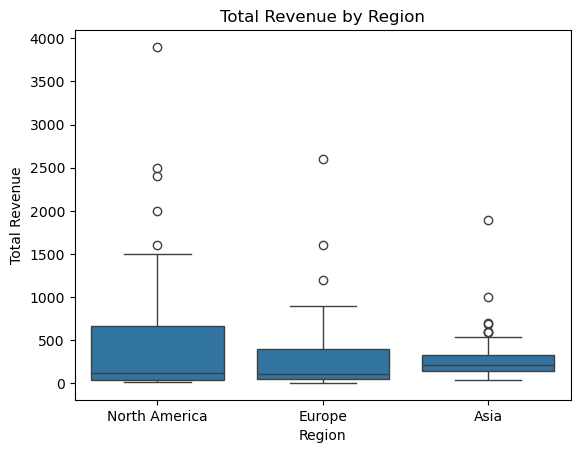

In [26]:
sns.boxplot(x='Region', y='Total Revenue', data=data)
plt.title('Total Revenue by Region')
plt.show()

In [27]:
data.groupby(['Product Category','Region'])['Total Revenue'].sum()

Product Category  Region       
Beauty Products   Europe            2621.90
Books             North America     1861.93
Clothing          Asia              8128.93
Electronics       North America    34982.41
Home Appliances   Europe           18646.16
Sports            Asia             14326.52
Name: Total Revenue, dtype: float64

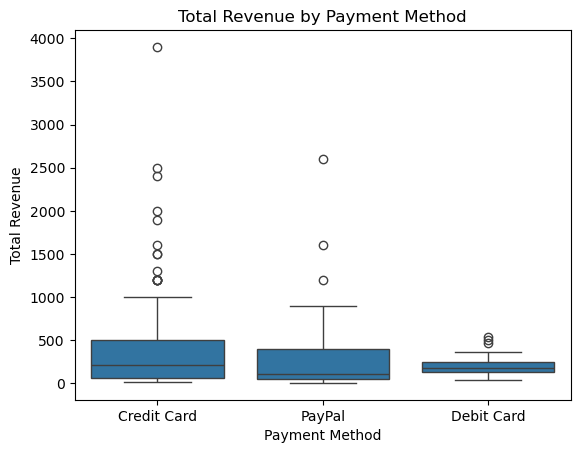

In [28]:
sns.boxplot(x='Payment Method', y='Total Revenue', data=data)
plt.title('Total Revenue by Payment Method')
plt.show()

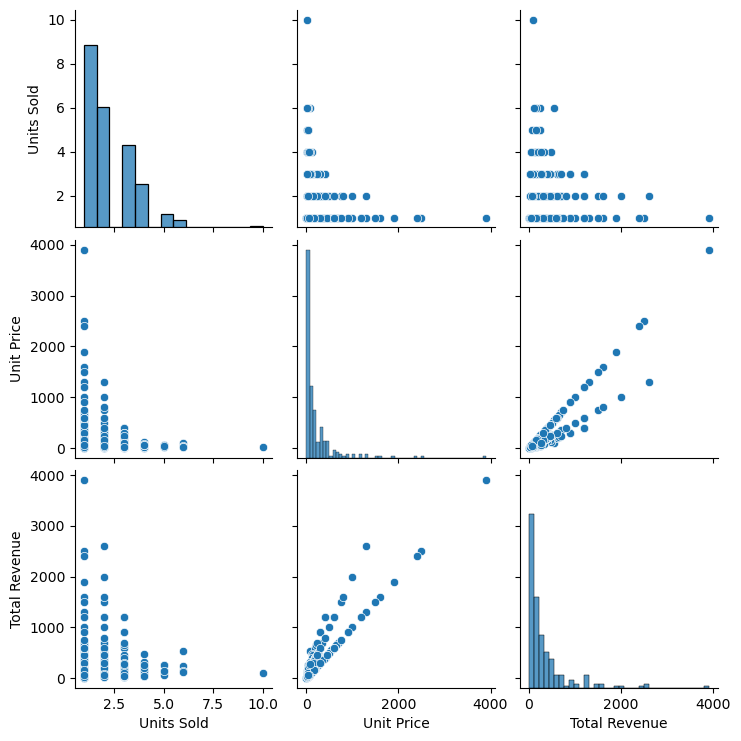

In [29]:
sns.pairplot(data[['Units Sold', 'Unit Price', 'Total Revenue']])
plt.show()